In [1]:
import rescaling
import numpy as np
import h5py
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
sim_path = 'targets/SXS_BBH_0001/rhOverM_Asymptotic_GeometricUnits_CoM.h5'

In [3]:
tot_m = 80.0

In [4]:
sp, sc = rescaling.rescale(sim_path, tot_m)

In [5]:
tlen = len(sp)
psd_file ='H1L1-O1_C02_HARM_MEAN_PSD-1126051217-11203200.txt'
f_low = 30.

my_psd = pycbc.psd.read.from_txt(filename = psd_file, length = tlen//2 +1, delta_f = sp.delta_f, low_freq_cutoff = f_low, is_asd_file = False)




In [6]:
snr = pycbc.filter.matched_filter(sp, sp, psd=my_psd,
                                      low_frequency_cutoff=30.)
print (snr)

[6.91665848e+21+0.00000000e+00j 6.79171913e+21+1.16827799e+21j
 6.42606882e+21+2.27540655e+21j ... 5.84407482e+21-3.26639254e+21j
 6.42606882e+21-2.27540655e+21j 6.79171913e+21-1.16827799e+21j]


In [7]:
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print (snrp)
snrp_norm = abs(snrp)
print (snrp_norm)

(6.916658477495428e+21+0j)
6.916658477495428e+21


In [8]:
snr4 = snr[len(snr) // 4: len(snr) * 3 // 4]
peak4 = abs(snr4).numpy().argmax()
snrp4 = snr4[peak]
time4 = snr4.sample_times[peak4]
snrp_norm4 = abs(snrp4)
print (snrp_norm4)

2.886758662615756e+19


In [9]:
ratio = 10./snrp_norm4
print (ratio)

3.4640928351588555e-19


In [10]:
import pycbc.types
new_y_values = np.array(sp)*ratio
sp_rescaled = pycbc.types.timeseries.TimeSeries(initial_array = new_y_values, delta_t = sp.delta_t)

In [11]:
snr_rescaled = pycbc.filter.matched_filter(sp_rescaled, sp_rescaled, psd=my_psd, low_frequency_cutoff=30.)
print (snr_rescaled)

[2395.99470751   +0.j         2352.71455756 +404.70234036j
 2226.04989673 +788.22195116j ... 2024.44177199-1131.50870104j
 2226.04989673 -788.22195116j 2352.71455756 -404.70234036j]


In [12]:
test_m, test_i = pycbc.filter.matchedfilter.match(sp_rescaled, sp_rescaled, psd=my_psd, low_frequency_cutoff=30.)
print (test_m)

0.9999999999999938


In [13]:
snr_rescaled = snr_rescaled[len(snr_rescaled) // 4: len(snr_rescaled) * 3 // 4]
peak_rescaled = abs(snr_rescaled).numpy().argmax()
snrp_rescaled = snr_rescaled[peak_rescaled]
time_rescaled = snr_rescaled.sample_times[peak_rescaled]
snrp_norm_rescaled = abs(snrp_rescaled)
print (snrp_norm_rescaled)
print (snrp_rescaled)

21.21120828317681
(-12.569561334006556+17.085709956070183j)


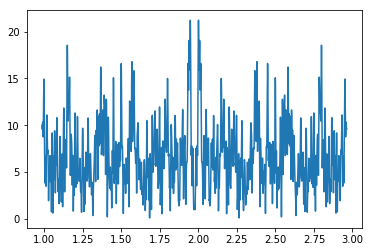

In [14]:
%matplotlib inline
import pylab
pylab.plot(snr_rescaled.sample_times, abs(snr_rescaled))
pylab.show()

In [15]:
delta_t = sp_rescaled.delta_t
duration = sp_rescaled.duration
tsamples = int(duration/delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, my_psd, seed=127)

print duration
print strain.duration

print len(sp_rescaled)
print len(strain)

3.94897460938
3.94897460938
16175
16175


In [16]:
print sp_rescaled.delta_f
print strain.delta_f
print sp_rescaled.delta_t
print strain.delta_t

0.253230293663
0.253230293663
0.000244140625
0.000244140625


In [17]:
delta_f = sp_rescaled.delta_f
delta_t = sp_rescaled.delta_t
tlen = len(sp_rescaled)

In [18]:
stilde = strain.to_frequencyseries()
flen = len(stilde)
psd2 = pycbc.psd.read.from_txt(filename = psd_file, length = flen, delta_f = delta_f, low_freq_cutoff = f_low, is_asd_file = False)
print psd2.delta_f
print flen
print (tlen//2 + 1)

0.253230293663
8088
8088


In [19]:
print (strain)

[ 3.76692586e-22  5.26861086e-22 -5.89033723e-22 ... -4.49538251e-22
  8.62521169e-22  2.61182725e-22]


In [45]:
import pycbc.vetoes
num_bins = 16
chisq = pycbc.vetoes.power_chisq(sp_rescaled, strain, num_bins, psd2,
                                      low_frequency_cutoff=f_low)
print (chisq)

0.506429277943
1.01260815822


In [40]:
delta_t = sp_rescaled.delta_t
tsamples = int((1.0/sp_rescaled.delta_f) / delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, my_psd, seed=127)
stilde = strain.to_frequencyseries()
print (stilde.delta_f)

0.506429277943


In [42]:
print (len(sp_rescaled))
print (len(stilde))

8088
4045


In [43]:
sp_rescaled.resize(len(stilde))

In [7]:
import pycbc.vetoes
num_bins = 16
chisq = pycbc.vetoes.power_chisq(sp_rescaled, stilde, num_bins, psd2,
                                      low_frequency_cutoff=f_low)


NameError: name 'sp_rescaled' is not defined

In [ ]:
data